# Para los datos de los archivos "bateria_tableta.txt" y "Salarios_minimos.csv":

- Realiza regresiones polinomiales de orden 1, 3, 5 y 7.

- Compara el R2 que te da cada modelo.

- Crea una gráfica con una nube de dispersión (datos originales) y tus modelos.

Separa adecuadamente con Markdown.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab import files
uploaded = files.upload()

Saving bateria_tableta.txt to bateria_tableta.txt
Saving Salarios_minimos.csv to Salarios_minimos.csv


## Lectura de los archivos

In [3]:
df= pd.read_csv('Salarios_minimos.csv')
df

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90
5,1991.84,13.33
6,1993.00,14.27
7,1994.00,15.27
8,1995.00,16.34
9,1995.30,18.30


In [4]:
txt= pd.read_csv('bateria_tableta.txt')
txt

,carga,duracion
0,2.81,5.62
1,7.14,8.00
2,2.72,5.44
3,3.87,7.74
4,1.90,3.80
...,...,...
95,4.38,8.00
96,8.06,8.00
97,8.05,8.00
98,1.10,2.20


## Creación de regresiones

### Salarios

In [5]:
df_np = df.to_numpy()
df_np

array([[1988.25,    8.  ],
       [1989.  ,    8.64],
       [1989.5 ,    9.16],
       [1990.  ,   10.08],
       [1990.84,   11.9 ],
       [1991.84,   13.33],
       [1993.  ,   14.27],
       [1994.  ,   15.27],
       [1995.  ,   16.34],
       [1995.3 ,   18.3 ],
       [1996.  ,   20.15],
       [1996.3 ,   22.6 ],
       [1997.  ,   26.45],
       [1998.  ,   30.2 ],
       [1999.  ,   34.45],
       [2000.  ,   37.9 ],
       [2001.  ,   40.35],
       [2002.  ,   42.15],
       [2003.  ,   43.65],
       [2004.  ,   45.24],
       [2005.  ,   46.8 ],
       [2006.  ,   48.67],
       [2007.  ,   50.57],
       [2008.  ,   52.59],
       [2009.  ,   54.8 ],
       [2010.  ,   57.46],
       [2011.  ,   59.82],
       [2012.  ,   62.33],
       [2013.  ,   64.76],
       [2014.  ,   67.29],
       [2015.  ,   70.1 ],
       [2016.  ,   73.04],
       [2017.  ,   80.04],
       [2018.  ,   88.36]])

In [99]:
X = df_np[:,0].reshape(-1, 1)
y = df_np[:,1]

In [7]:
y

array([ 8.  ,  8.64,  9.16, 10.08, 11.9 , 13.33, 14.27, 15.27, 16.34,
       18.3 , 20.15, 22.6 , 26.45, 30.2 , 34.45, 37.9 , 40.35, 42.15,
       43.65, 45.24, 46.8 , 48.67, 50.57, 52.59, 54.8 , 57.46, 59.82,
       62.33, 64.76, 67.29, 70.1 , 73.04, 80.04, 88.36])

#### Grados 1,3,5,7

In [103]:
ordenes = [1, 3, 5, 7]
predicciones = {}
for orden in ordenes :
  X_polinomial = np.hstack([X**i for i in range(1, orden+1)])
  lr= LinearRegression()
  lr.fit(X_polinomial,y)
  predicciones[orden] = lr.predict(X_polinomial)
  R2= lr.score(X_polinomial,y)
  print(f'Grado {orden}: Intercepto: {lr.intercept_}, coeficiente {lr.coef_}, R2 {R2}')

Grado 1: Intercepto: -5022.60217164143, coeficiente [2.52832885], R2 0.98445666630952
Grado 3: Intercepto: -5217722.9582693195, coeficiente [ 7.83146244e+03 -3.91934110e+00  6.54024500e-04], R2 0.9857366949646496
Grado 5: Intercepto: -534328.7907936319, coeficiente [ 3.32926286e-10  6.66831636e-07  6.67827159e-04 -5.01138166e-07
  1.00311032e-10], R2 0.9857546631343813
Grado 7: Intercepto: -156804.77949517986, coeficiente [ 1.91160388e-23 -1.65984995e-18  9.20291789e-17  1.22888842e-13
  1.02560834e-10 -8.54813517e-14  1.83257513e-17], R2 0.9857730993924559


In [66]:
print (X_polinomial)

[[1.98825000e+03 3.95313806e+06 7.85982675e+09 1.56273005e+13
  3.10709803e+16 6.17768766e+19 1.22827875e+23]
 [1.98900000e+03 3.95612100e+06 7.86872467e+09 1.56508934e+13
  3.11296269e+16 6.19168279e+19 1.23152571e+23]
 [1.98950000e+03 3.95811025e+06 7.87466034e+09 1.56666368e+13
  3.11687738e+16 6.20102755e+19 1.23369443e+23]
 [1.99000000e+03 3.96010000e+06 7.88059900e+09 1.56823920e+13
  3.12079601e+16 6.21038406e+19 1.23586643e+23]
 [1.99084000e+03 3.96344391e+06 7.89058267e+09 1.57088876e+13
  3.12738818e+16 6.22612948e+19 1.23952276e+23]
 [1.99184000e+03 3.96742659e+06 7.90247897e+09 1.57404737e+13
  3.13525052e+16 6.24491739e+19 1.24388762e+23]
 [1.99300000e+03 3.97204900e+06 7.91629366e+09 1.57771733e+13
  3.14439063e+16 6.26677053e+19 1.24896737e+23]
 [1.99400000e+03 3.97603600e+06 7.92821578e+09 1.58088623e+13
  3.15228714e+16 6.28566055e+19 1.25336071e+23]
 [1.99500000e+03 3.98002500e+06 7.94014988e+09 1.58405990e+13
  3.16019950e+16 6.30459800e+19 1.25776730e+23]
 [1.995300

### Gráfica

In [15]:
import matplotlib.pyplot as plt

/tmp/ipython-input-3186297288.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


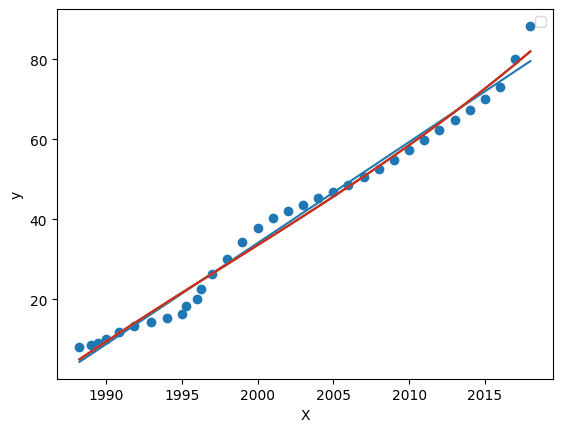

In [94]:
indice = X.flatten().argsort()
X_ord = X.flatten()[indice]
plt.scatter(X, y)

for orden, y_pred in predicciones.items():
    plt.plot(X_ord, y_pred[indice])

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


###Tableta

In [49]:
txt



array([[ 2.81,  5.62],
       [ 7.14,  8.  ],
       [ 2.72,  5.44],
       [ 3.87,  7.74],
       [ 1.9 ,  3.8 ],
       [ 7.82,  8.  ],
       [ 7.02,  8.  ],
       [ 5.5 ,  8.  ],
       [ 9.15,  8.  ],
       [ 4.87,  8.  ],
       [ 8.08,  8.  ],
       [ 5.58,  8.  ],
       [ 9.13,  8.  ],
       [ 0.14,  0.28],
       [ 2.  ,  4.  ],
       [ 5.47,  8.  ],
       [ 0.8 ,  1.6 ],
       [ 4.37,  8.  ],
       [ 5.31,  8.  ],
       [ 0.  ,  0.  ],
       [ 1.78,  3.56],
       [ 3.45,  6.9 ],
       [ 6.13,  8.  ],
       [ 3.53,  7.06],
       [ 4.61,  8.  ],
       [ 1.76,  3.52],
       [ 6.39,  8.  ],
       [ 0.02,  0.04],
       [ 9.69,  8.  ],
       [ 5.33,  8.  ],
       [ 6.37,  8.  ],
       [ 5.55,  8.  ],
       [ 7.8 ,  8.  ],
       [ 2.06,  4.12],
       [ 7.79,  8.  ],
       [ 2.24,  4.48],
       [ 9.71,  8.  ],
       [ 1.11,  2.22],
       [ 8.38,  8.  ],
       [ 2.33,  4.66],
       [ 1.83,  3.66],
       [ 5.94,  8.  ],
       [ 9.2 ,  8.  ],
       [ 1.

In [105]:
X = txt[:,0].reshape(-1, 1)
y = txt[:,1]

### Grados 1,3,5,7

In [106]:
ordenes = [1, 3, 5, 7]
predicciones = {}
for orden in ordenes :
  X_polinomial = np.hstack([X**i for i in range(1, orden+1)])
  lr= LinearRegression()
  lr.fit(X_polinomial,y)
  predicciones[orden] = lr.predict(X_polinomial)
  R2= lr.score(X_polinomial,y)
  print(f'Grado {orden}: Intercepto: {lr.intercept_}, coeficiente {lr.coef_}, R2 {R2 }')

Grado 1: Intercepto: 2.8705411116210198, coeficiente [0.72955585], R2 0.6872269726243967
Grado 3: Intercepto: -0.8445986553682463, coeficiente [ 3.34240792 -0.39326189  0.01452403], R2 0.9780671146743033
Grado 5: Intercepto: 0.14276244863231113, coeficiente [ 8.35890085e-01  1.10347381e+00 -3.23550360e-01  3.20123836e-02
 -1.07054199e-03], R2 0.9953630126134433
Grado 7: Intercepto: -0.026730011142747756, coeficiente [ 2.63586646e+00 -1.38252388e+00  1.01240187e+00 -3.16715233e-01
  4.60134802e-02 -3.15491538e-03  8.27801489e-05], R2 0.998096560245418


In [107]:
abc= [6,3,10]
abc= np.array(abc)
indx=abc.argsort()
print (indx)
abc_ord= abc[indx]
abc_ord

[1 0 2]


array([ 3,  6, 10])

/tmp/ipython-input-3186297288.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


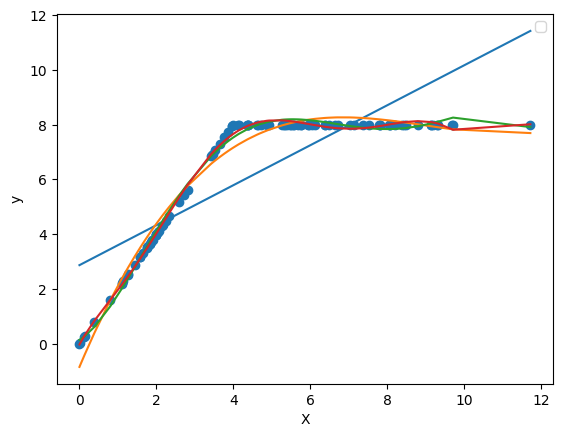

In [108]:
indice = X.flatten().argsort()
X_ord = X.flatten()[indice]
plt.scatter(X, y)

for orden, y_pred in predicciones.items():
    plt.plot(X_ord, y_pred[indice])

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
